In [216]:
import pandas as pd
import numpy as np
import datetime

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angellicacsavage/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/angellicacsavage/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/angellicacsavage/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [126]:
# read the csv file into a dataframe
df = pd.read_csv('PowerRangers.csv')
df.shape

(920, 11)

In [127]:
def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

In [128]:
def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

In [129]:
def convert_pos(pos):
    if pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def lem_with_pos_tag(a_string):
    # Initalize our Lemmer
    lemmatizer = WordNetLemmatizer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Get the word and pos_tag for each of the words. 
    tagged_words = nltk.pos_tag(words)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in tagged_words:
        
        # The word is the first element in the tuple
        the_word = word[0]
        
        # The pos_tag is the second element in the tuple
        the_pos_tag = word[1]
        
        # Convert the pos_tag into the format the lemmatizer accepts
        the_pos_tag = convert_pos(the_pos_tag)
        
        # Lemmatize the word with the pos_tag
        lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        
        # Append stemmed word to our valid_words
        valid_words.append(lemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

In [130]:
# Function to format columns
def text_pipeline(input_string):
    #input_string = make_lower(input_string)
    #input_string = remove_punctuation(input_string)
    #input_string = lem_with_pos_tag(input_string)
    input_string = remove_stopwords(input_string)    
    return input_string

In [131]:
# Create a column that removes stop words from the original description column, not sure if it is still needed
df['desc_clean'] = df['desc']
df['desc_clean'] = df['desc_clean'].apply(text_pipeline)

In [132]:
df.shape

(920, 12)

<AxesSubplot:xlabel='producer', ylabel='Rating_per_Season'>

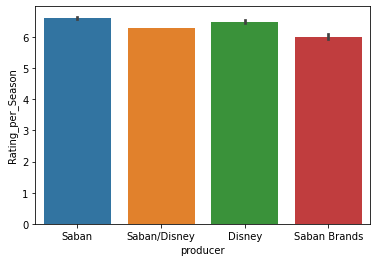

In [133]:
sns.barplot(data=df, x="producer", y="Rating_per_Season")

In [134]:
# Create a dataframe with seasons only to get the top five rated seasons
df_seasons = df[['season_title', 'Rating_per_Season', 'air_date_first_ep', 'producer']].copy()
df_seasons.drop_duplicates(inplace=True)
df_seasons = df_seasons.reset_index()
df_seasons.drop(['index'], axis=1, inplace = True)
df_seasons['year'] = pd.DatetimeIndex(df_seasons['air_date_first_ep']).year
#df_seasons

<AxesSubplot:xlabel='year', ylabel='Rating_per_Season'>

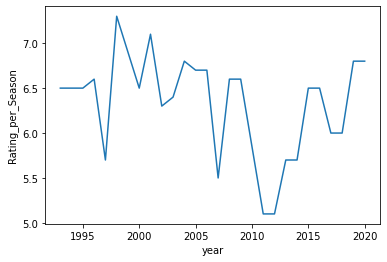

In [135]:
# Wanted to display a graph that had points for the top five seasons, not such how to do it
sns.lineplot(data=df_seasons, x="year", y="Rating_per_Season")


<AxesSubplot:xlabel='year', ylabel='Rating_per_Episode'>

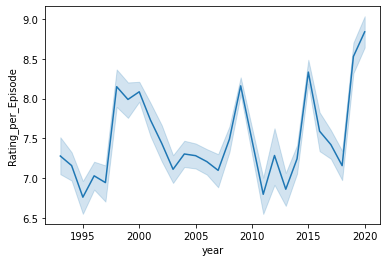

In [136]:
df['year'] = pd.DatetimeIndex(df['air_date']).year
sns.lineplot(data=df, x="year", y="Rating_per_Episode")


In [250]:
topseason = df_seasons.nlargest(1, ['Rating_per_Season'])
tseason = topseason['season_title'].tolist()
print(f"The top rated season is {tseason[0]}")


The top rated season is In Space


In [251]:
lowseason = df_seasons.nsmallest(1, ['Rating_per_Season'])
lseason = lowseason['season_title'].tolist()
print(f"The lowest rated season is {lseason[0]}")


The lowest rated season is Samurai


In [252]:
topepisode = df.nlargest(1, ['Rating_per_Episode'])
tepisode = topepisode['episode_title'].tolist()
print(f"The overall top rated episode is {tepisode[0]}")


The overall top rated episode is Source Code


In [253]:
lowepisode = df.nsmallest(1, ['Rating_per_Episode'])
lepisode = lowepisode['episode_title'].tolist()
print(f"The lowest rated episode overall is {lepisode[0]}")


The lowest rated episode overall is The Great Bookala Escape


In [224]:
df_new

,index,season_title,episode_num,episode_title,air_date,Rating_per_Episode,total_votes,desc,season_num,air_date_first_ep,...,astronema,koragg,the knight wolf,master vile,machine empire,psycho rangers,dai shi,venjix,lord zedd,month
0,250,In Space,1,From Out of Nowhere: Part 1,2/6/1998,8.5,328,The Rangers and Alpha 6 are sucked into an unk...,6,1998-02-06,...,False,False,False,False,False,False,False,False,False,2
1,251,In Space,2,From Out of Nowhere: Part 2,2/13/1998,8.5,301,With the Astro Megaship stranded on an uninhab...,6,1998-02-06,...,True,False,False,False,False,False,False,False,False,2
2,252,In Space,3,Save Our Ship,2/20/1998,8.0,286,"The Rangers return to Earth, and attempt to bo...",6,1998-02-06,...,True,False,False,False,False,False,False,False,False,2
3,253,In Space,4,Shell Shocked,2/27/1998,6.6,322,The Space Rangers meet the Teenage Mutant Ninj...,6,1998-02-06,...,False,False,False,False,False,False,False,False,False,2
4,254,In Space,5,Never Stop Searching,3/6/1998,8.4,281,Carlos stumbles upon Andros watching a video o...,6,1998-02-06,...,False,False,False,False,False,False,False,False,False,3
5,255,In Space,6,Satellite Search,3/13/1998,7.3,279,NASADA asks the Rangers to help retrieve a cra...,6,1998-02-06,...,False,False,False,False,False,False,False,False,False,3
6,256,In Space,7,A Ranger Among Thieves,3/20/1998,7.9,273,With his four Earthen teammates busy with Math...,6,1998-02-06,...,False,False,False,False,False,False,False,False,False,3
7,257,In Space,8,When Push Comes to Shove,3/27/1998,7.5,280,"Cassie loses her diary, which she believes may...",6,1998-02-06,...,True,False,False,False,False,False,False,False,False,3
8,258,In Space,9,The Craterite Invasion,4/3/1998,8.6,277,A malfunction with the Megaship's Simudeck rel...,6,1998-02-06,...,False,False,False,False,False,False,False,False,False,4
9,259,In Space,10,The Wasp with a Heart,4/4/1998,8.2,281,"Waspicable, a kind-hearted monster from Earth,...",6,1998-02-06,...,False,False,False,False,False,False,False,False,False,4


There are 43 episodes in Power Rangers In Space season


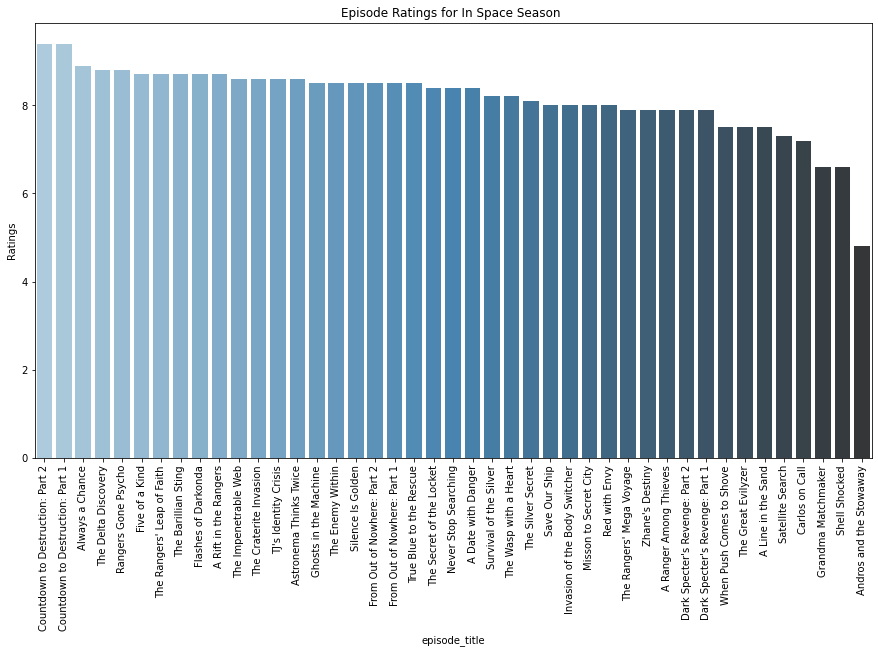

In [255]:
df_new = (df[df['season_title'] == 'In Space']).reset_index()
print(f"There are {df_new['episode_title'].count()} episodes in Power Rangers {tseason[0]} season")

plt.figure(figsize = (15,8))
ax = sns.barplot(x='episode_title', y='Rating_per_Episode', data=df_new, 
                 order=df_new.sort_values('Rating_per_Episode', ascending = False).episode_title, palette="Blues_d")
ax.set_title('Episode Ratings for In Space Season ')
ax.set(xlabel='episode_title', ylabel= 'Ratings')
ax.tick_params(axis='x', rotation=90)


In [256]:
topep = df_new.nlargest(2, ['Rating_per_Episode'])
tep = topep['episode_title'].tolist()
print(f"The top rated episodes from Power Rangers In space season are\n{tep[0]} and {tep[1]}")


The top rated episodes from Power Rangers In space season are
Countdown to Destruction: Part 1 and Countdown to Destruction: Part 2


In [257]:
lowep = df_new.nsmallest(1, ['Rating_per_Episode'])
lep = lowep['episode_title'].tolist()
print(f"The lowest rated episode from the In space season is {lep[0]}")


The lowest rated episode from the In space season is Andros and the Stowaway


In [258]:
char_names = ['rita', 'goldar', 'squatt', 'baboo', 'finster', 'scorpina', 'tenaya', 'diabolico', 
              'admiral malkor', 'ransik', 'queen bansheera', 'mesogog', 'dark specter', 'trakeena',
              'sledge', 'lothor', 'astronema', 'koragg', 'the knight wolf', 'master vile',
              'machine empire', 'psycho rangers', 'dai shi', 'venjix', 'lord zedd']
for character_name in char_names:
    df[character_name] = df['desc_clean'].apply(lambda x: character_name in x.lower())
    

In [259]:
rating_dic = {}
for character_name in char_names:
    rating_dic[character_name] = df[df[character_name]].Rating_per_Episode.mean()
    for key in rating_dic:
        rating_dic[key] = round(rating_dic[key], 2)

# def print_villians(dct):
#     print("Top rated villians in these episodes are:")
#     for villian, rating in dct.items():
#         print("{} (rating: {})".format(villian, rating))


print_villians(rating_dic)


Top rated villians in these episodes are:
rita (rating: 7.06)
goldar (rating: 7.47)
squatt (rating: 6.6)
baboo (rating: 6.85)
finster (rating: 7.33)
scorpina (rating: 8.1)
tenaya (rating: 8.13)
diabolico (rating: 8.2)
admiral malkor (rating: 7.4)
ransik (rating: 8.13)
queen bansheera (rating: 8.45)
mesogog (rating: 7.45)
dark specter (rating: 8.43)
trakeena (rating: 8.26)
sledge (rating: 8.38)
lothor (rating: 7.32)
astronema (rating: 8.35)
koragg (rating: 7.23)
the knight wolf (rating: 7.2)
master vile (rating: 7.17)
machine empire (rating: 7.54)
psycho rangers (rating: 8.68)
dai shi (rating: 7.52)
venjix (rating: 8.2)
lord zedd (rating: 7.02)


Based on 25 Villians from The Power Rangers series


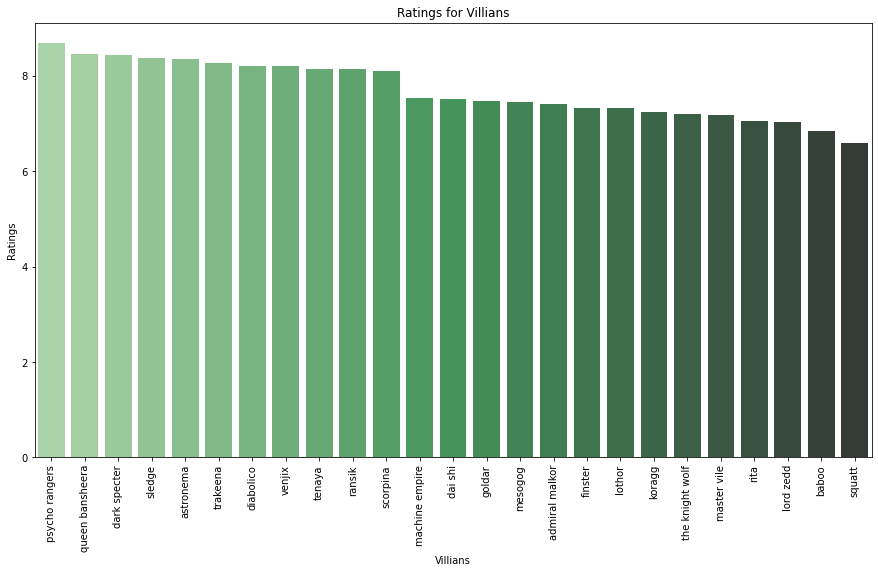

In [271]:
villians = list(rating_dic.keys())
ratings = list(rating_dic.values())

vil_dic = {'Villians': villians, 'Ratings': ratings}
vil_df = pd.DataFrame.from_dict(vil_dic)

print("Based on 25 Villians from The Power Rangers series")
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Villians', y='Ratings', data=vil_df, 
                 order=vil_df.sort_values('Ratings', ascending = False).Villians, palette="Greens_d")
ax.set_title('Ratings for Villians')
ax.set(xlabel='Villians', ylabel= 'Ratings')
ax.tick_params(axis='x', rotation=90)

In [187]:
res = dict(sorted(rating_dic.items(), key = itemgetter(1), reverse = True)[:1])
for villian, rating in res.items():
        print("{} is the highest rated villian(rating: {})".format(villian, rating))
        

psycho rangers is the highest rated villian(rating: 8.68)


In [191]:
count_dic = {}
for column in df[char_names]:
    columnSeriesObj = df[column]
    count_dic[column] = columnSeriesObj.value_counts()[True]

res = dict(sorted(count_dic.items(), key = itemgetter(1), reverse = True)[:1])
for villian, rating in res.items():
        print("{} appears the most, {} times".format(villian, rating))

rita appears the most, 73 times


In [195]:
res = dict(sorted(rating_dic.items(), key = itemgetter(1), reverse = False)[:1])
for villian, rating in res.items():
        print("{} is the lowest rated villian(rating: {})".format(villian, rating))

squatt is the lowest rated villian(rating: 6.6)


In [198]:
res = dict(sorted(count_dic.items(), key = itemgetter(1), reverse = False)[:1])
for villian, rating in res.items():
        print("{} appears the least, only {} time".format(villian, rating))

admiral malkor appears the least, only 1 time
